In [6]:
#Afficher le sgraphiques dans la continuité du code et non pas dans une fenêtre à part
%matplotlib inline
#Afficher des graphiques
import matplotlib.pyplot as plt

from random import randint, seed
from enum import Enum

class Strategie(Enum):
    CHANGER=1
    GARDER=2
    
def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes=[0,1,2]
    bonne_porte=randint(0,2)
    premier_choix=randint(0,2)
    portes.remove(premier_choix)
    if premier_choix==bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes=[bonne_porte]
     
    deuxieme_choix=0
    if strategie==Strategie.CHANGER:
        deuxieme_choix=portes[0]
    else:
        deuxieme_choix=premier_choix
    
    return deuxieme_choix == bonne_porte


def play(strategie, nb_tours):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

print("En changeant de porte, le joueur a gagné {} sur 10000 parties.".format(sum(play(Strategie.CHANGER,10000))))
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties.".format(sum(play(Strategie.GARDER,10000))))



En changeant de porte, le joueur a gagné 6632 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3293 sur 10000 parties.


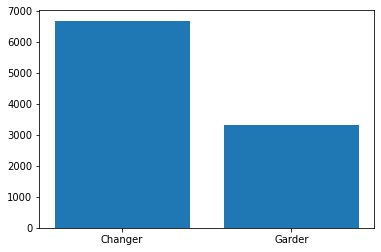

In [7]:
plot = plt.bar([1,2],[sum(play(Strategie.CHANGER, 10000)), 
               sum(play(Strategie.GARDER, 10000))], 
        tick_label=["Changer","Garder"])

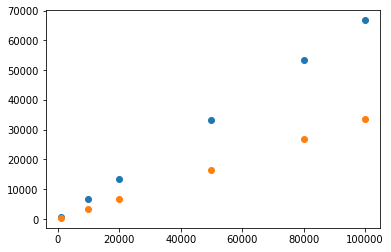

In [8]:
gains_changer = []
gains_garder = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))

figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])